In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from VAE import *
%matplotlib inline
from matplotlib import pyplot as plt

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
batch_size = 32
learning_rate = 1e-3
epoch = 100
label_size = 10

encoder
kld :  1.2997  likelihood:  -544.74615
loss in  0 epoch  1  batch :  804.68616
kld :  0.12525092  likelihood:  -330.33737
loss in  1 epoch  1  batch :  355.38754
kld :  0.104432374  likelihood:  -262.04733
loss in  2 epoch  1  batch :  282.9338
kld :  0.09995777  likelihood:  -227.56676
loss in  3 epoch  1  batch :  247.55832
kld :  0.099646226  likelihood:  -209.50201
loss in  4 epoch  1  batch :  229.43126
kld :  0.09976512  likelihood:  -199.39256
loss in  5 epoch  1  batch :  219.34558
kld :  0.09996377  likelihood:  -193.38695
loss in  6 epoch  1  batch :  213.3797
kld :  0.10008025  likelihood:  -189.65938
loss in  7 epoch  1  batch :  209.67543
kld :  0.10020254  likelihood:  -187.26917
loss in  8 epoch  1  batch :  207.30968
kld :  0.10030921  likelihood:  -185.69545
loss in  9 epoch  1  batch :  205.7573
kld :  0.10038332  likelihood:  -184.64236
loss in  10 epoch  1  batch :  204.71902
kld :  0.10043133  likelihood:  -183.92162
loss in  11 epoch  1  batch :  204.00787

kld :  0.1003744  likelihood:  -181.96848
loss in  98 epoch  1  batch :  202.04335
kld :  0.100374326  likelihood:  -181.96844
loss in  99 epoch  1  batch :  202.0433


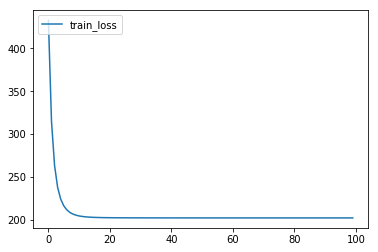

In [4]:
with tf.Session() as sess:
    
    vae = VAE(
        input_shape=list(mnist.train.images.shape[1:]),
        label_size=label_size,
        batch_size=100,
        learning_rate=learning_rate
    )
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    loss_history = []
    
    for i in range(epoch):
      loss_mean = 0
      for j in range(1000):
        #images,_ = mnist.train.next_batch(batch_size)
        images = mnist.train.images[:batch_size]
        _,loss,kld,likelihood = vae.train(images,sess)
        #op,loss,kld,likelihood
        loss_mean+= loss
        if (j % 1000 == 1):
            print('kld : ',kld,' likelihood: ',likelihood)
            print('loss in ',i,'epoch ',j,' batch : ',loss)
      loss_mean /= 1000
      loss_history.append(loss_mean)
    
    
    plt.plot(loss_history)
    plt.legend(['train_loss'],loc='upper left')
    
    Z = np.random.normal(size=(batch_size,label_size))
    predict = vae.predict(Z,sess)



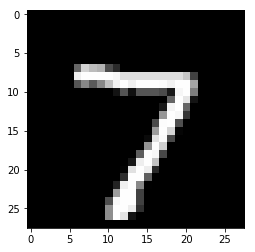

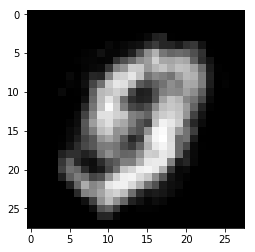

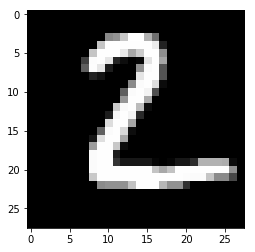

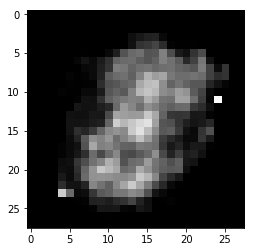

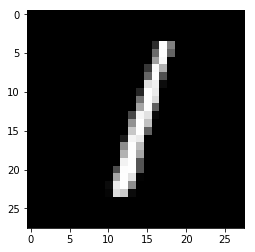

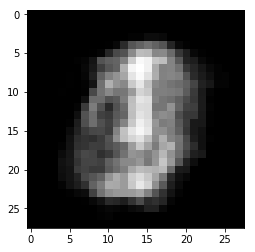

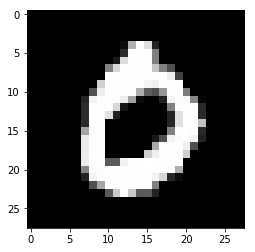

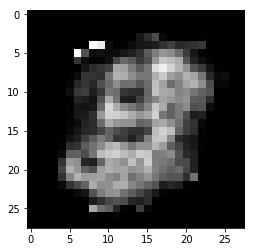

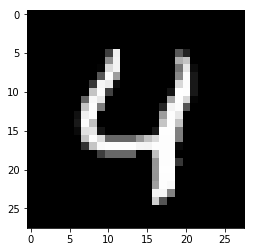

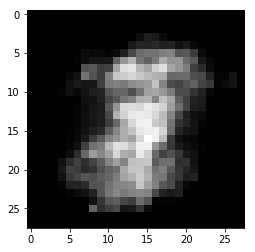

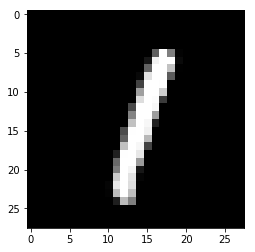

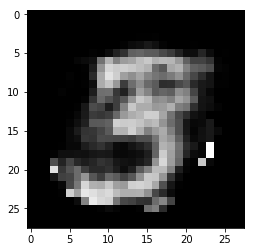

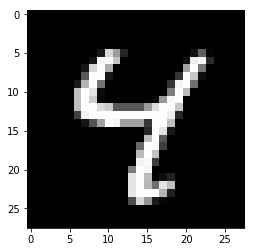

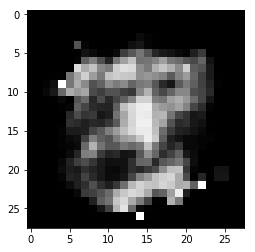

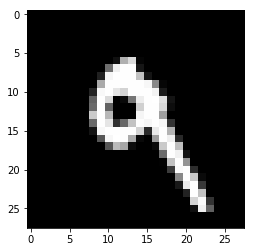

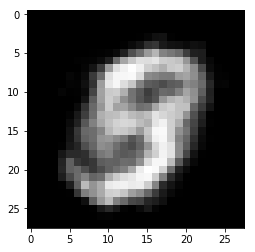

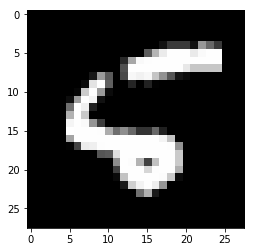

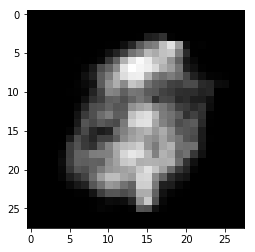

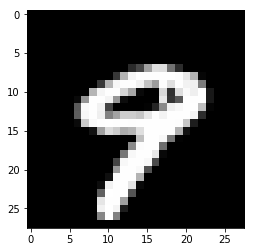

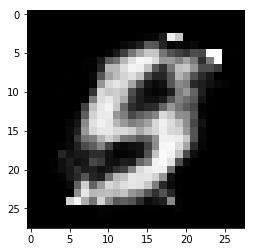

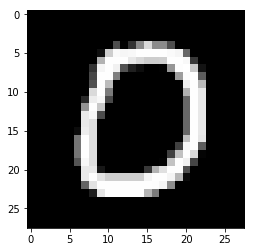

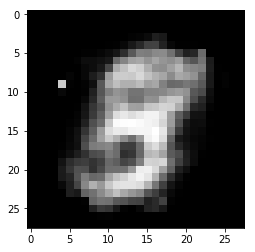

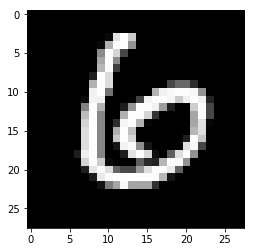

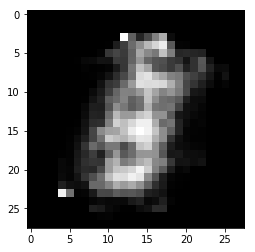

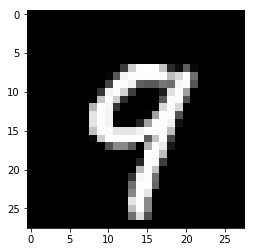

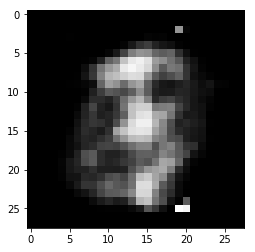

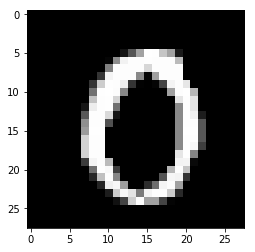

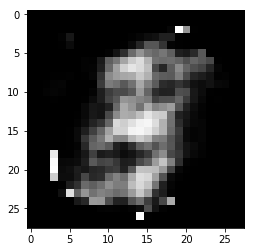

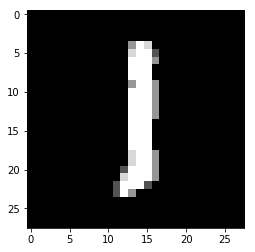

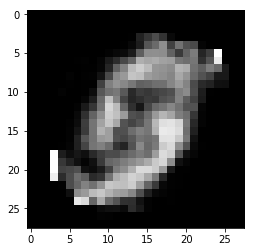

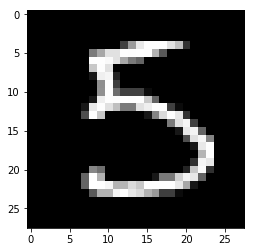

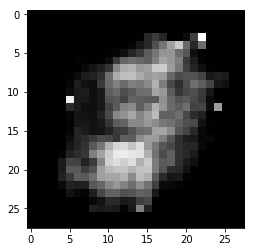

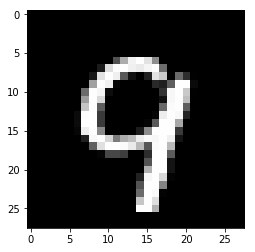

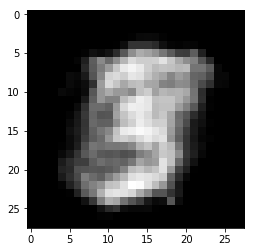

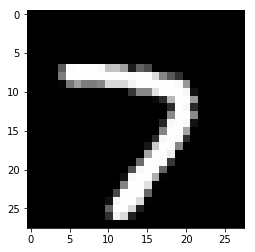

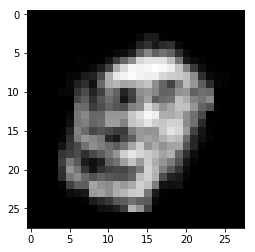

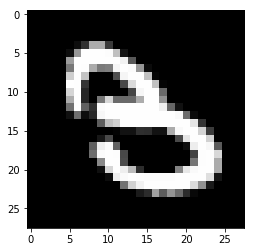

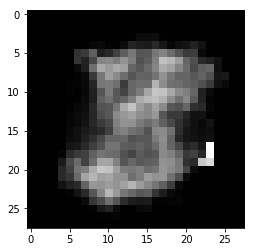

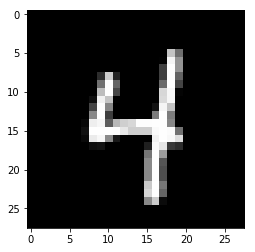

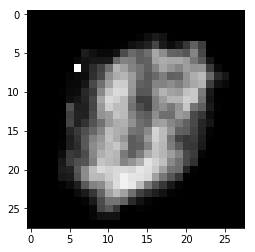

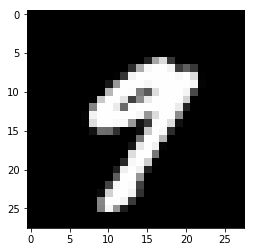

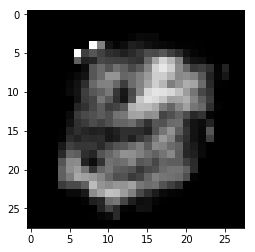

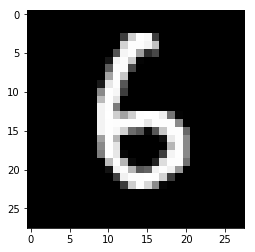

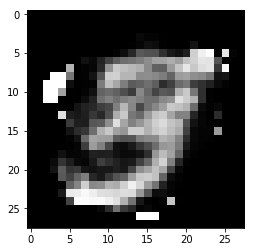

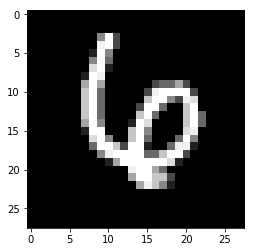

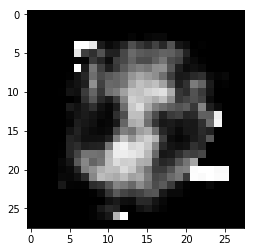

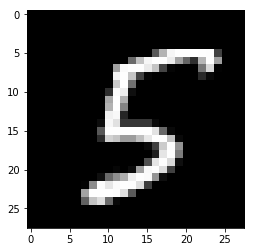

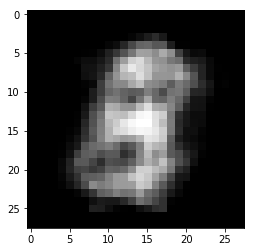

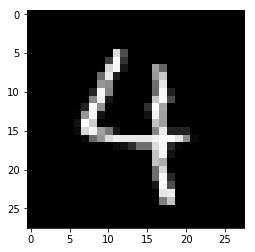

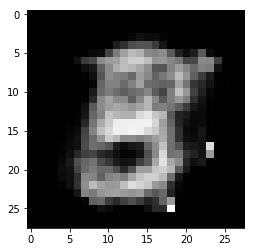

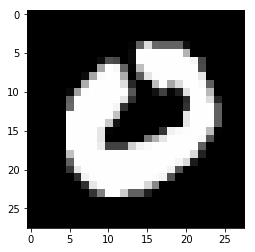

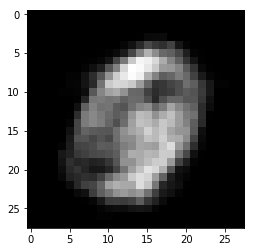

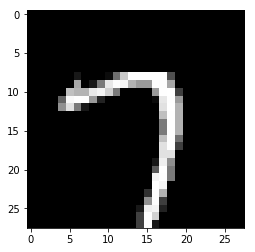

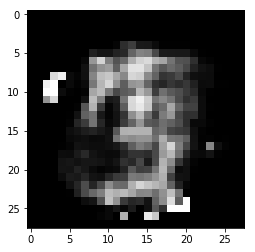

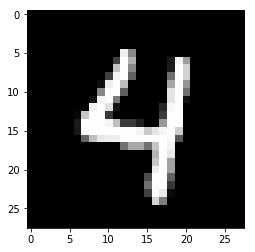

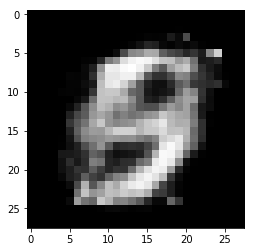

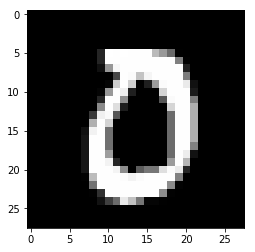

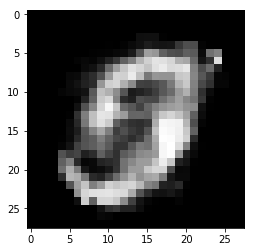

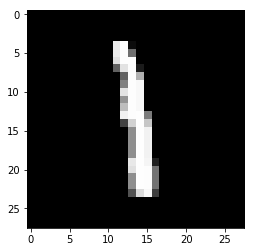

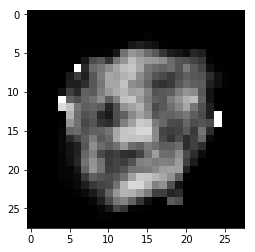

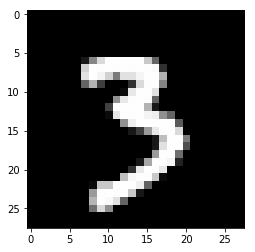

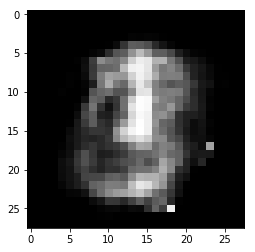

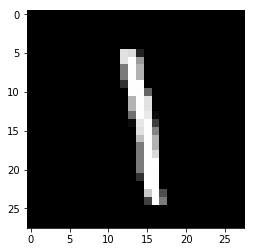

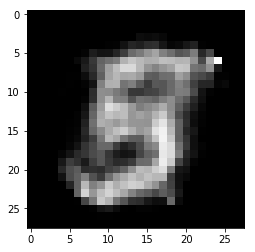

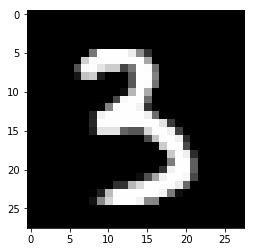

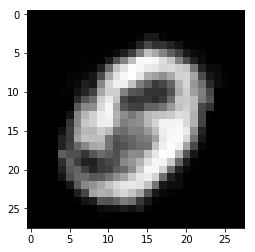

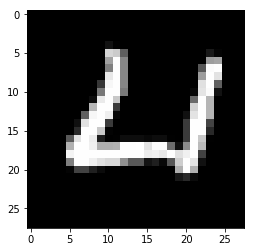

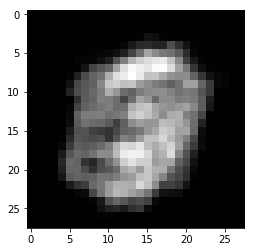

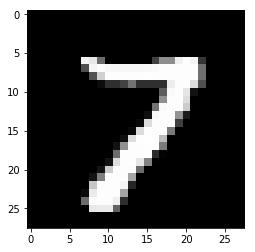

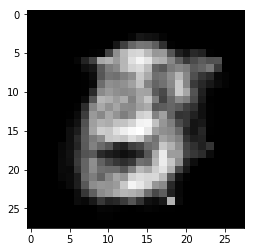

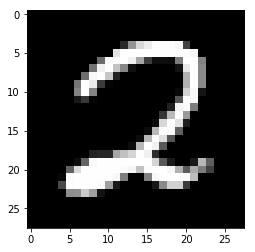

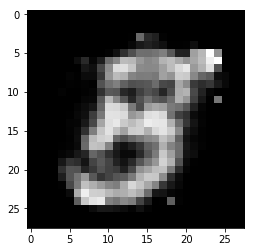

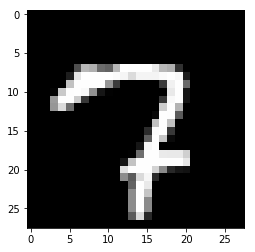

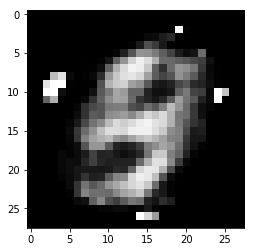

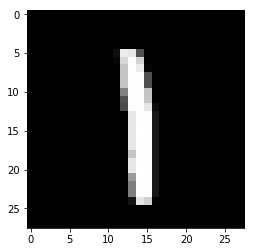

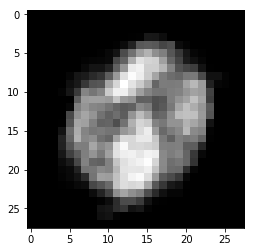

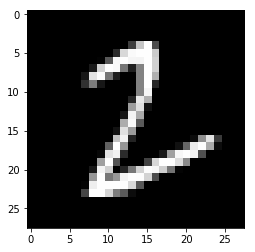

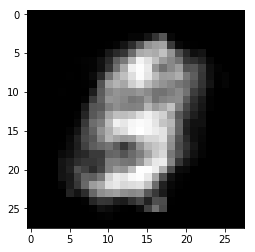

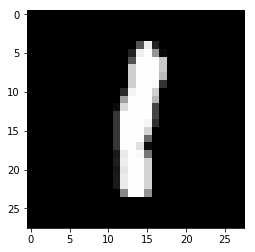

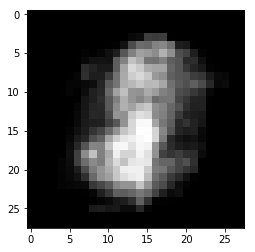

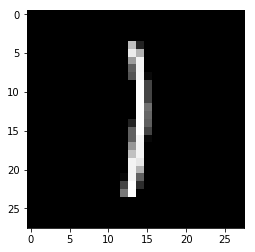

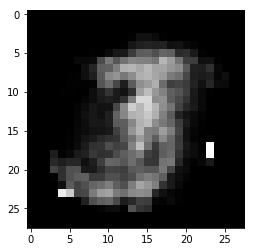

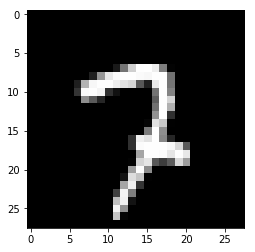

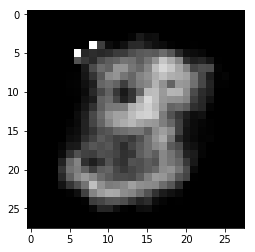

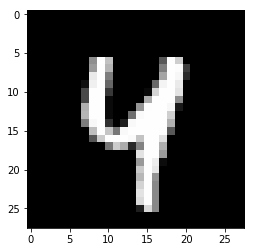

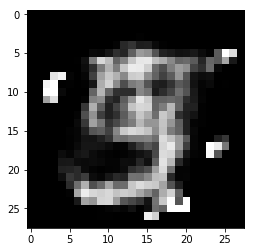

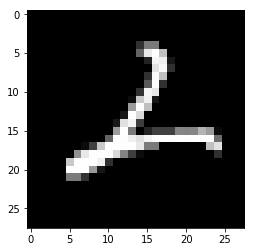

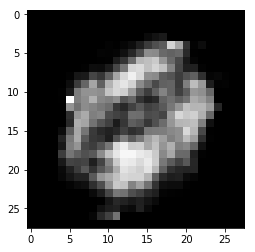

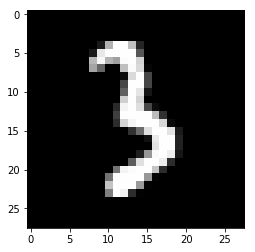

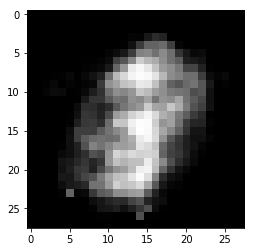

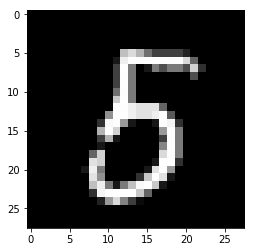

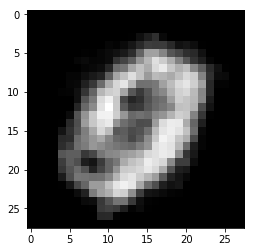

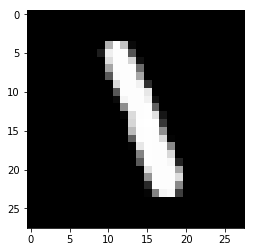

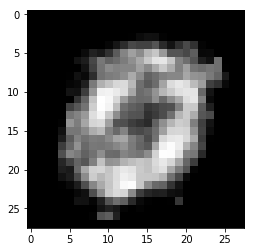

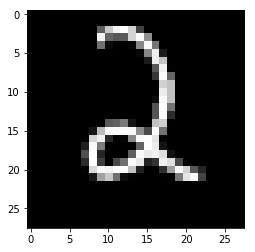

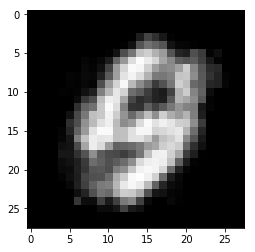

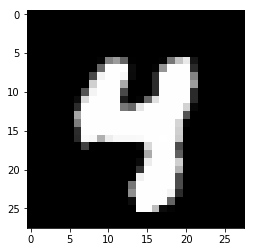

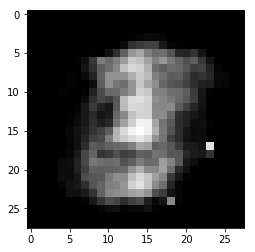

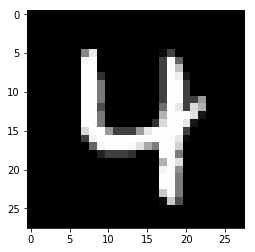

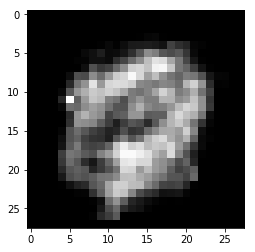

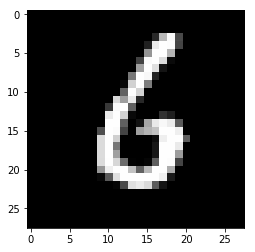

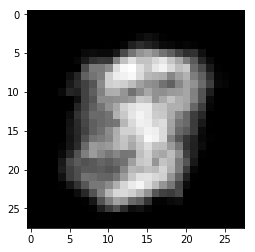

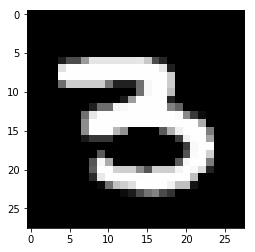

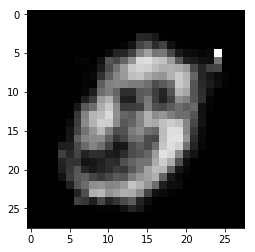

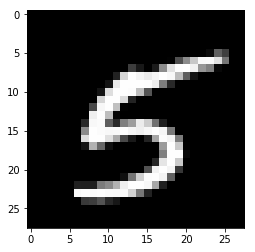

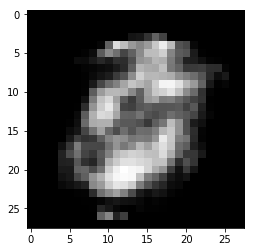

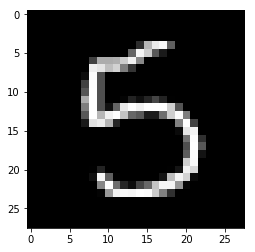

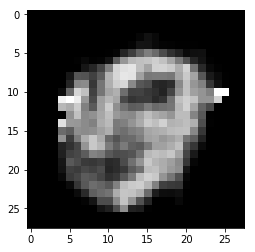

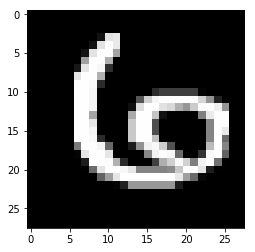

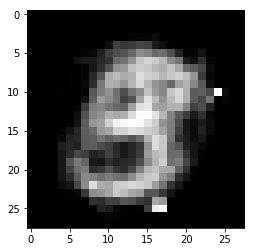

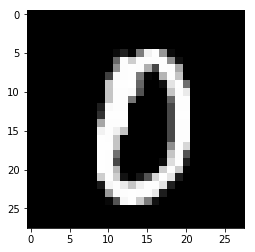

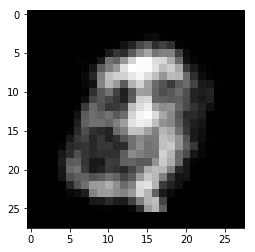

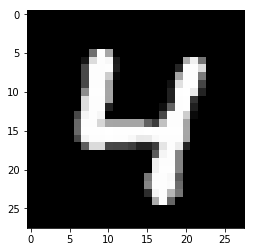

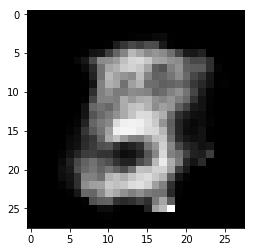

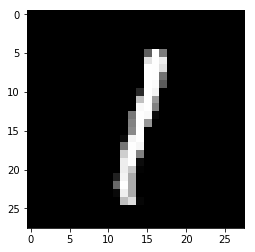

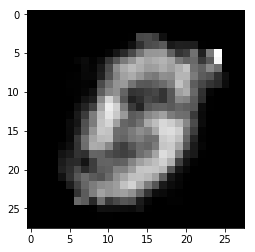

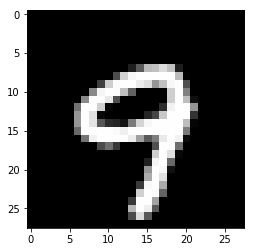

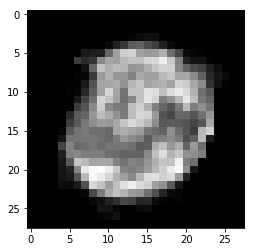

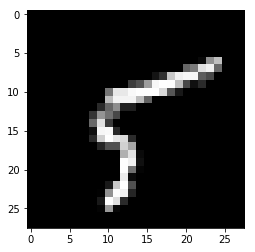

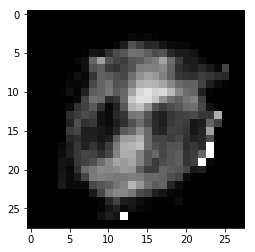

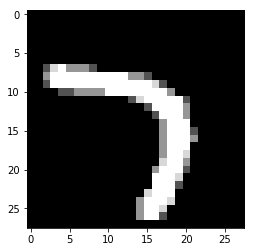

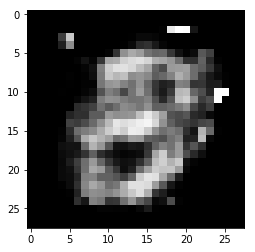

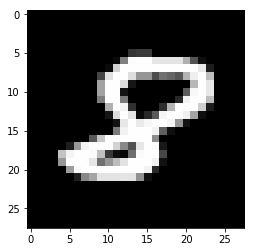

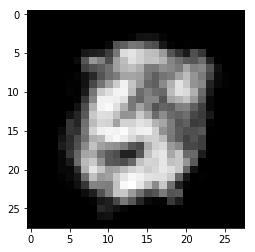

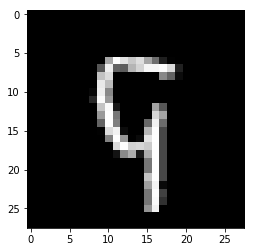

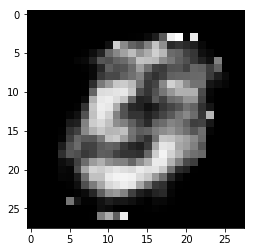

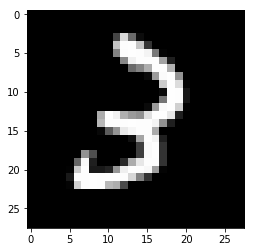

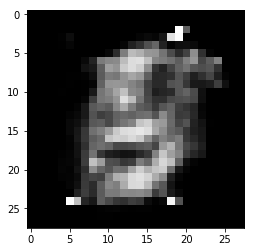

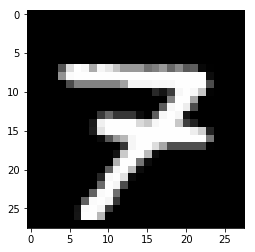

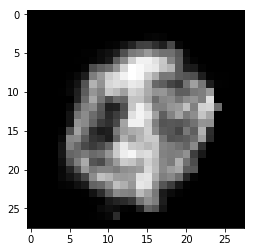

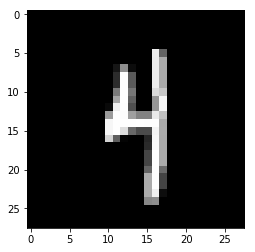

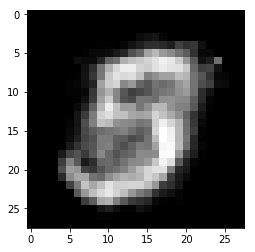

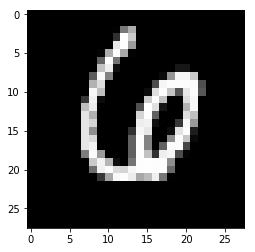

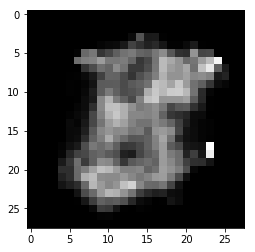

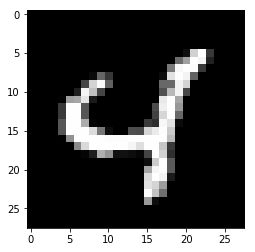

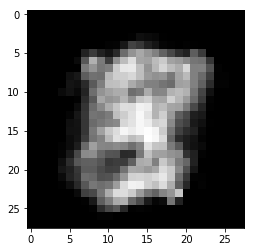

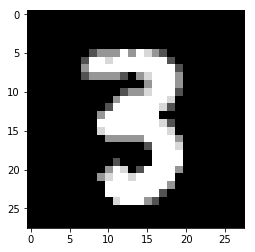

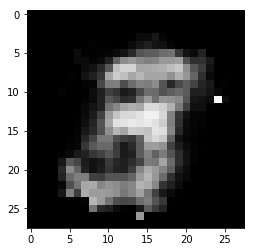

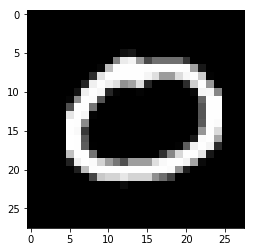

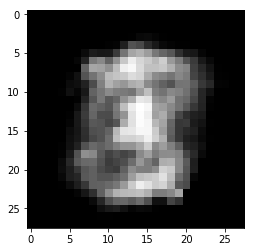

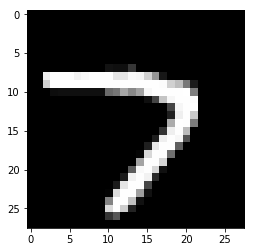

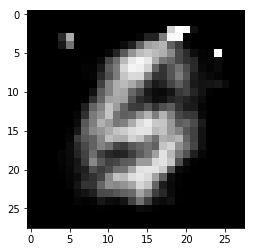

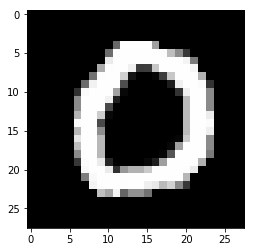

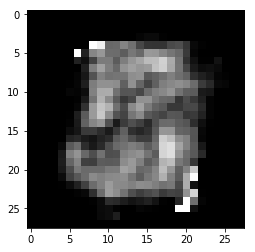

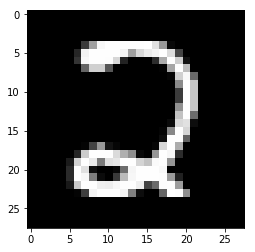

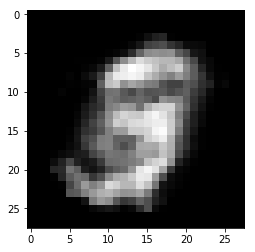

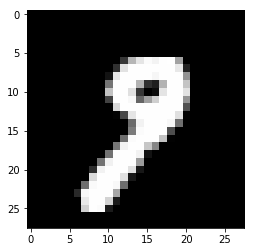

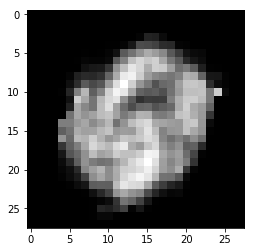

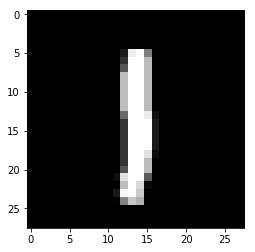

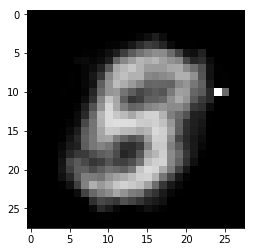

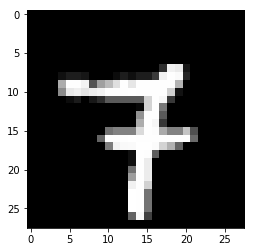

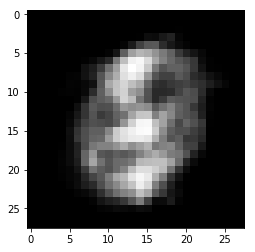

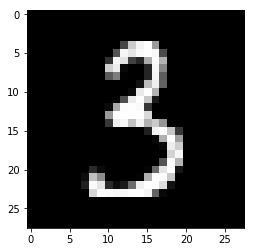

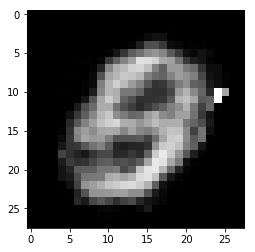

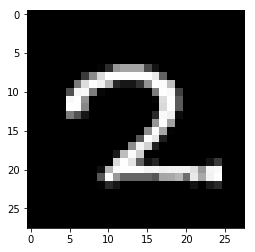

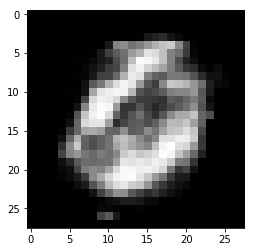

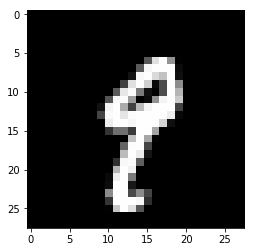

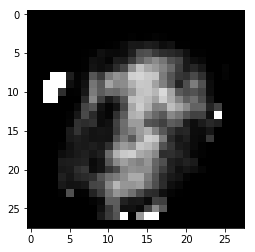

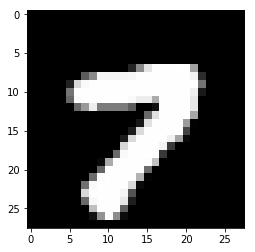

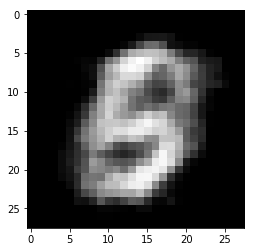

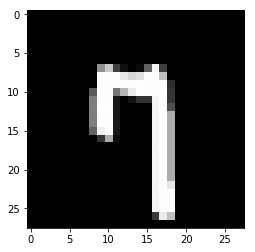

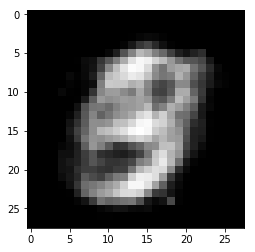

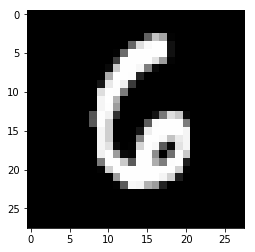

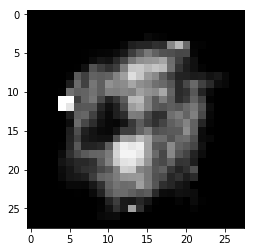

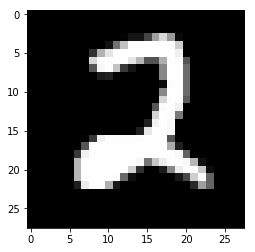

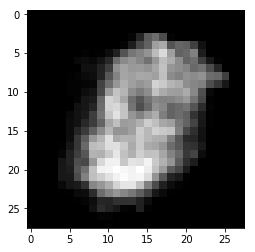

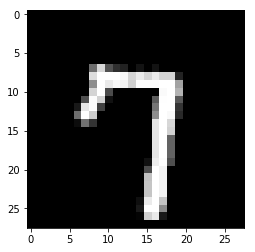

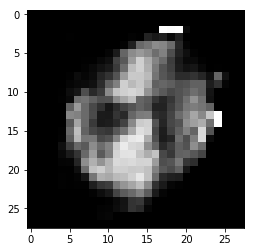

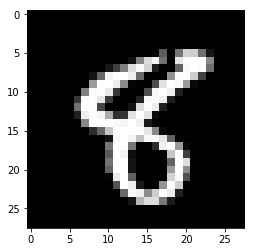

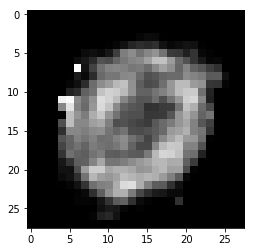

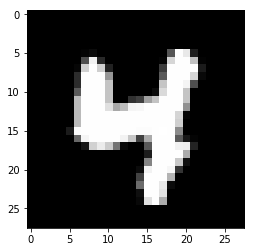

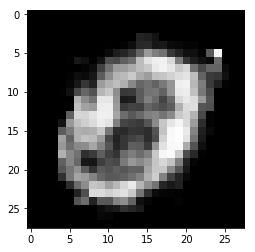

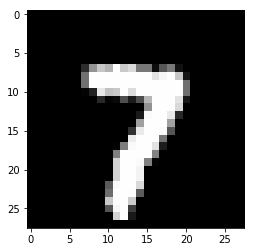

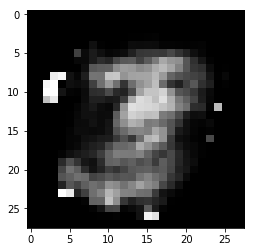

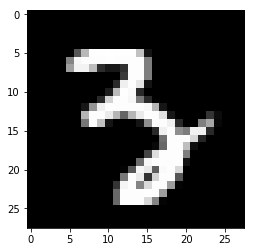

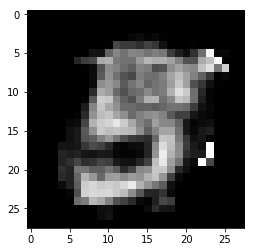

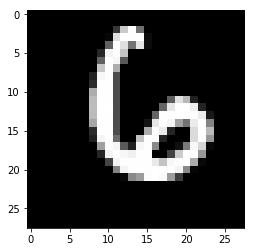

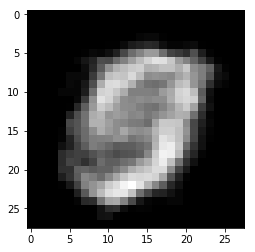

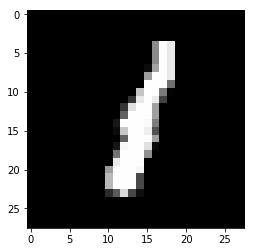

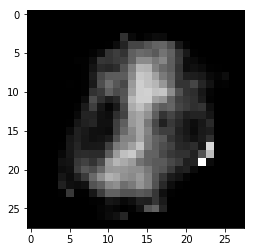

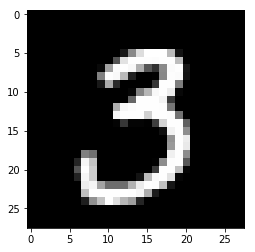

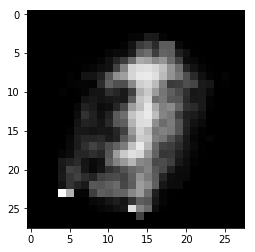

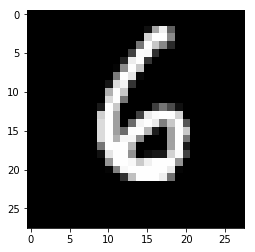

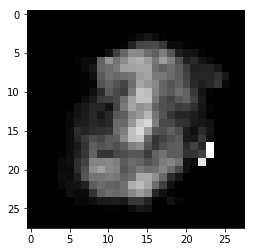

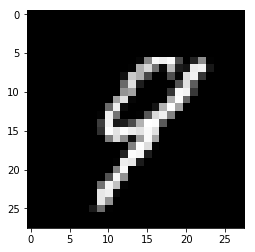

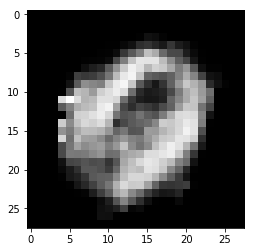

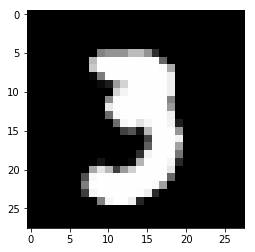

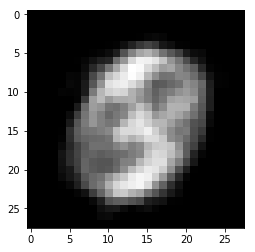

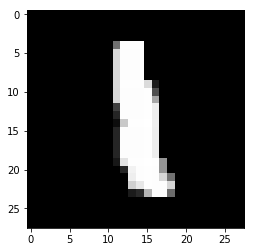

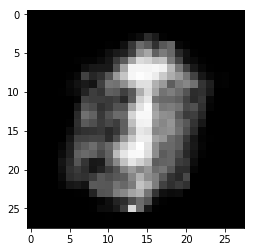

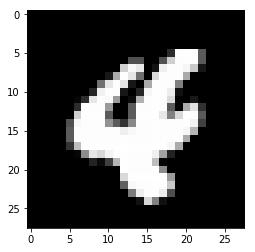

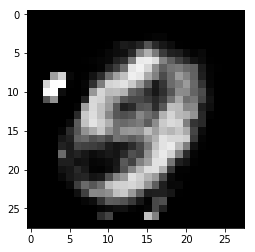

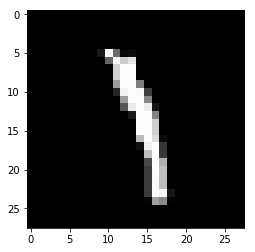

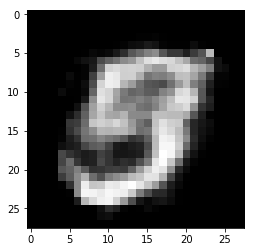

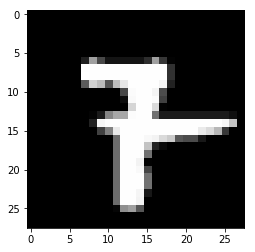

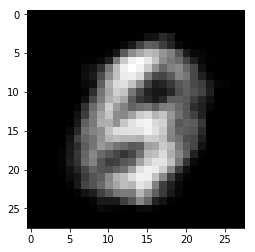

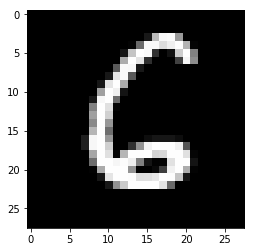

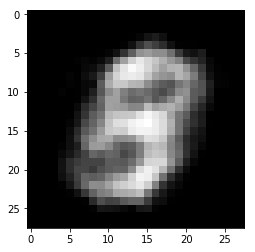

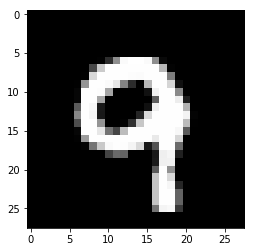

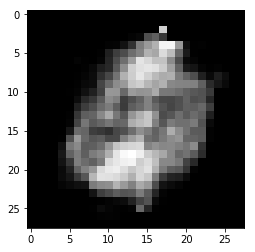

In [6]:
for i in range(batch_size):
    plt.imshow(mnist.test.images[i].reshape(28,28),cmap='Greys_r')
    plt.show()
    plt.imshow(predict[i].reshape(28,28),cmap = 'Greys_r')
    plt.show()

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.62352943 0.54509807 